# Assignment 1
* Student name: ALEXANDRA kUZNETSOVA
* Student number: 11379758
* Date: 22.03.2019
* Wordcount: (1405)

## Introduction

During the last couple of years Tesla company has been experiencing the rapid growth in sales (Growth in Tesla, 2018). In case of Tesla company where every car is made on demand, we can argue that Say’s rule is valid. This means that demand creates supply, and the greater demand means growth in popularity of the brand (Ackley, 1961). However, despite this sales growth Tesla stock graph shows very unpleasant wavy tendency (Nasdaq). A lot of specialists and mere consumers connect these declines with Elon Musk twitter posts (Wolverton, 2019; Davis, 2019). They argue that Musk’s style of communication with unpredictable tweets harms not only Tesla company stocks but also negatively affects the image of Tesla company in the eyes of its customers (Fleishman, 2018; Ferris, 2018).

To help Tesla company to pick up the best communication strategy and to better understand whether it is necessary to control what appears in Elon Musk twitter account (Ohnsman, 2019; Neate, 2019) I formulate the following research question:

RQ. How does the information source on Twitter affect customer engagement and to what extent customer approval relates to stock price?

Words count: 186


## Hypotheses

Customer engagement in social media depend on the level of satisfaction of customer with the content which specific brand’s information source provides. The main components of customer engagement in social media is likes and retweets (Boyd et al., 2010). Bucher (2012) found that the level of engagement is the main indicator of post reach. Summing up these two studies we get that the more people are involved and care what appears in post than the higher level of engagement, and the source with the higher level of engagement has the higher level of reach. The level of engagement in social media is also define the level of influence of the information source (Booth & Matic, 2011). Studies also show that the possibility of influence of particular individual on brand is possible but in case when this person is associated with the brand and transferred its own traits of personality directly to the brand (McCracken 1989; Aaker, 1997).To find out which informational source has higher level of engagement and therefore influence I formulate the following hypothesis:

H1. Tweets from Elon Musk about Tesla receive more customer engagement on Twitter than tweets from the official Tesla account.

If the above stated hypothesis is true and Elon Musk is more influential in social media it may appears that indeed Tesla stock prices and therefore success may be associated with Elon Musk more than with Tesla company. Williams and Naumann (2011) argue there is significant association between customer approval and company performance. The level of approval is more reasonable to measure only with the number of likes because people who make retweets do not always support and approve the initial post conten, but rather opposite.

H2. The Tesla company stock prices positively relate to the level of approval of Elon Musk tweets. 

Words count : 271


## Gathering data
### Import libraries and initialize API



In [1]:
import tweepy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid', palette='deep', font_scale=1.1, rc={'figure.figsize': [16, 8]})
import numpy as np
import json

As I collect a relatively big amount of data I am going to save all data in json. This is because it performs much faster in loadings than files saved in pickle. (Pickle vs JSON, 2010)

In [2]:
name_tesla = 'Tesla'
name_musk = 'elonmusk'

consumer_key = '5NTdgEYyu0ikbduFxjPJconG0'
consumer_secret = 'RhoB2yyWl8L6mS3EmSEzCoMGlPsMX1z3XKQ0j2MXAagHwzU6yU'

oauth_token = '4227898119-lQpkWMTn4mUPxNX9kPpoHbWlRJsmjsAzPwUHyZ8'
oauth_token_secret = 'hp9Ga2IuDfPMGV2j56EfddLmaIrTP7BbgIWcurOXVaVY7'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(oauth_token, oauth_token_secret)

# the are rate limits for the frequency of API calls for twitter, 
# wait_on_rate_limit flag helps us not to worry about it while collecting the data
api = tweepy.API(auth)#, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

### Collect tweets for the Hypothesis 1
The data for the first hypothesis were collected with Twitter API’s. User_timeline allows us to collect only last 3200 tweets what is enough for our study (Get Tweet timelines, 2017). Tweets were collected from public Twitter account of Tesla car company ‘@Tesla’ and from verified account of Elon Musk ‘@elonmusk’. To collect this sort of data we had to use tokens and secret keys which are personal information, therefore it is impossible to publish the full code in this paper. We chose to use last 3200 tweets for the analyzation because firstly it allows us to form more clean data frame without extra cleaning and from specific accounts. Secondly, these tweets are from the past what is important for data generalization. The data were collected collected on 10th of March 2019 and stored in the sasharomanna GitHub personal repository.


In [10]:
tweets_tesla = []
for status in tweepy.Cursor(api.user_timeline, screen_name=name_tesla, tweet_mode='extended').items():
    tweets_tesla.append(status._json)

In [11]:
len(tweets_tesla)

3203

In [70]:
file = open('tweets_tesla.json', 'w', encoding='utf8')
json.dump(tweets_tesla, file, indent=2)
file.close()

In [14]:
tweets_musk = []
for status in tweepy.Cursor(api.user_timeline, screen_name=name_musk, tweet_mode='extended').items():
    tweets_musk.append(status._json)

In [15]:
len(tweets_musk)

3219

In [71]:
file = open('tweets_musk.json', 'w', encoding='utf8')
json.dump(tweets_musk, file, indent=2)
file.close()

Reading collected data if it has been collected already

In [4]:
file = open('tweets_tesla.json', 'r', encoding='utf8')
tweets_tesla = json.load(file)
file.close()

In [5]:
file = open('tweets_musk.json', 'r', encoding='utf8')
tweets_musk = json.load(file)
file.close()

#### Making the dataframes for Tesla and Musk tweets, fill the data

In [6]:
#Making dataframe for Tesla tweets
df_tesla = pd.DataFrame(data=[tweet['full_text'] for tweet in tweets_tesla], columns=['Text'])

df_tesla['len'] = np.array([len(tweet['full_text']) for tweet in tweets_tesla])
df_tesla['id'] = np.array([tweet['id'] for tweet in tweets_tesla])
df_tesla['Date'] = np.array([tweet['created_at'] for tweet in tweets_tesla])
df_tesla['Likes'] = np.array([tweet['favorite_count'] for tweet in tweets_tesla])
df_tesla['RTs'] = np.array([tweet['retweet_count'] for tweet in tweets_tesla])

df_tesla.tail()

,Text,len,id,Date,Likes,RTs
3198,"@JaredBanyard Thanks for the feedback, Jared. ...",65,454049902494875648,Thu Apr 10 00:15:07 +0000 2014,2,0
3199,@yodirkx Fixed. Thank you for the feedback.,43,454034919199473664,Wed Apr 09 23:15:34 +0000 2014,3,0
3200,When life gives you lemons… http://t.co/1TrjvP...,50,453997981990002688,Wed Apr 09 20:48:48 +0000 2014,434,345
3201,@kristinecrook You can see our closest stores ...,137,453975455926734848,Wed Apr 09 19:19:17 +0000 2014,3,0
3202,@kristinecrook Wait until you sit in one!,41,453974774687879168,Wed Apr 09 19:16:35 +0000 2014,1,0


In [7]:
#Checking the columns
df_tesla.columns

Index(['Text', 'len', 'id', 'Date', 'Likes', 'RTs'], dtype='object')

In [8]:
#Making dataframe for Musk tweets
df_musk = pd.DataFrame(data=[tweet['full_text'] for tweet in tweets_musk], columns=['Text'])

df_musk['len'] = np.array([len(tweet['full_text']) for tweet in tweets_musk])
df_musk['id'] = np.array([tweet['id'] for tweet in tweets_musk])
df_musk['Date'] = np.array([tweet['created_at'] for tweet in tweets_musk])
df_musk['Likes'] = np.array([tweet['favorite_count'] for tweet in tweets_musk])
df_musk['RTs'] = np.array([tweet['retweet_count'] for tweet in tweets_musk])

df_musk.head(10)

,Text,len,id,Date,Likes,RTs
0,@Drew78823936 @Erdayastronaut @DJSnM @RocketTe...,256,1104517220313382912,Sat Mar 09 23:00:00 +0000 2019,1227,67
1,@DJSnM @RocketTenor @NASA @SpaceX @Space_Stati...,177,1104514410935050240,Sat Mar 09 22:48:51 +0000 2019,1781,96
2,@dmk184 @NASA @SpaceX @Space_Station @Commerci...,119,1104511205933146112,Sat Mar 09 22:36:06 +0000 2019,976,32
3,@iamkostmos @NASA @SpaceX @Space_Station @Comm...,125,1104510803313487872,Sat Mar 09 22:34:30 +0000 2019,1117,41
4,@xandriteme @NASA @SpaceX @Space_Station @Comm...,104,1104510381886603264,Sat Mar 09 22:32:50 +0000 2019,855,23
5,@ajithshan03 @NASA @SpaceX @Space_Station @Com...,61,1104510016948592641,Sat Mar 09 22:31:23 +0000 2019,1032,19
6,@NASA @SpaceX @Space_Station @Commercial_Crew ...,239,1104509345922838528,Sat Mar 09 22:28:43 +0000 2019,12674,909
7,@TheOnion https://t.co/JoBxDo3zwh,33,1104498091305009152,Sat Mar 09 21:44:00 +0000 2019,66143,6929
8,@MKBHD @Tesla 😉,15,1104462447652438016,Sat Mar 09 19:22:22 +0000 2019,81646,2813
9,"@Astronotic_s 27,000 km/h",25,1104147569762947072,Fri Mar 08 22:31:09 +0000 2019,2477,63


In [9]:
#Checking Musk dataframe columns
df_musk.columns

Index(['Text', 'len', 'id', 'Date', 'Likes', 'RTs'], dtype='object')

### Collecting data for the Hypothesis 2 and Hypothesis 2a.

For the Hypothesis 2 we used the dataset with last 3200 Elon Musk tweets (df_musk - dataframe) which helped to apply customer ‘Likes’ in our further analysation. For dependent variable ‘Stocks’, we downloaded Tesla company stocks dataset from an open source Nasdaq. We chose to get only two years Tesla stock data as this time frame better suits to the number of tweets (3200) and nicely represent the annual stock tendency. (obtained data time frame: 17:03:2017 - 20.03.2019)




In [10]:
#Uploading Tesla stock data
teslastock = pd.read_csv('Teslastock.csv')

In [11]:
teslastock.head()

,date,close,volume,open,high,low
0,12:31,271.52,"8,369,687",267.50,273.3000,263.46
1,2019/03/18,269.49,10264960.0000,276.00,278.0500,267.30
2,2019/03/15,275.43,14757360.0000,283.51,283.7244,274.40
3,2019/03/14,289.96,7048138.0000,292.45,295.3900,288.29
4,2019/03/13,288.96,6817854.0000,283.90,291.9900,282.70


In [12]:
teslastock.describe()

,close,open,high,low
count,503.000000,503.000000,503.000000,503.000000
mean,321.409513,321.428333,326.900309,315.480327
std,28.643734,28.882711,28.799501,28.774974
min,250.560000,251.560000,255.070000,244.590100
25%,301.600000,301.795000,306.950000,295.500000
50%,320.080000,319.140000,324.790000,313.920000
75%,344.515000,344.960000,349.200000,338.272400
max,385.000000,386.690000,389.610000,379.345000


In [13]:
#Checking Tesla stock columns
teslastock.columns

Index(['date', 'close', 'volume', 'open', 'high', 'low'], dtype='object')

## Data cleaning
### Hypothesis 1


Last 3200 tweets were collected specifically for the H1 testing, therefore the data frames – df_musk and df_tesla do not require much cleaning. Though, several things still should be done. First, we need to create necessary for hypothesis (H1) variables, namely variable engagement for the each of the data frame.  This variable will be consist of two elements – likes and retweets. Second, we need to eliminate all NaN results replacing it with 0.

In [14]:
#Creating Tesla engagement scale
df_tesla['engagement'] = df_tesla['Likes']+df_tesla['RTs']

In [15]:
df_musk.columns

Index(['Text', 'len', 'id', 'Date', 'Likes', 'RTs'], dtype='object')

In [16]:
#Creating Elon Musk engagement scale
df_musk['engagement'] = df_musk['Likes']+df_musk['RTs']

In [17]:
df_musk.columns

Index(['Text', 'len', 'id', 'Date', 'Likes', 'RTs', 'engagement'], dtype='object')

In [18]:
df_musk.head()

,Text,len,id,Date,Likes,RTs,engagement
0,@Drew78823936 @Erdayastronaut @DJSnM @RocketTe...,256,1104517220313382912,Sat Mar 09 23:00:00 +0000 2019,1227,67,1294
1,@DJSnM @RocketTenor @NASA @SpaceX @Space_Stati...,177,1104514410935050240,Sat Mar 09 22:48:51 +0000 2019,1781,96,1877
2,@dmk184 @NASA @SpaceX @Space_Station @Commerci...,119,1104511205933146112,Sat Mar 09 22:36:06 +0000 2019,976,32,1008
3,@iamkostmos @NASA @SpaceX @Space_Station @Comm...,125,1104510803313487872,Sat Mar 09 22:34:30 +0000 2019,1117,41,1158
4,@xandriteme @NASA @SpaceX @Space_Station @Comm...,104,1104510381886603264,Sat Mar 09 22:32:50 +0000 2019,855,23,878


In [19]:
#Replacing all NaN values from Tesla engagement scale with 0
df_tesla['engagement'] = df_tesla['engagement'].fillna(0)

In [20]:
#Replacing all NaN values from Musk engagement scale with 0
df_musk['engagement'] = df_musk['engagement'].fillna(0)

### Hypothesis 2 

This hypothesis requires data cleaning and data merging of two dataframes - teslastock and df_musk.

Prior the merging procedure we should standardize the column by which two dataframes will be merged. We have one common column - date. As we can see from the previous section these columns have slightly different titles and completely different date formats. Thus, we should make the titles of the columns and the date formats identical.

In [21]:
#Renaming teslastock dataframe, making the column date identical to column Date in the df_musk
teslastock_ren = teslastock.rename(columns={'date': 'Date'}) 

In [22]:
#checking for renamed column
teslastock_ren.columns

Index(['Date', 'close', 'volume', 'open', 'high', 'low'], dtype='object')

In [23]:
#importing datetimemodule for date format standartization
from datetime import datetime

In [24]:
#Converting string column Date to a datetime object in df_musk
df_musk['Date'] = pd.DatetimeIndex(pd.to_datetime(df_musk['Date'])).normalize()

In [25]:
df_musk.head()

,Text,len,id,Date,Likes,RTs,engagement
0,@Drew78823936 @Erdayastronaut @DJSnM @RocketTe...,256,1104517220313382912,2019-03-09,1227,67,1294
1,@DJSnM @RocketTenor @NASA @SpaceX @Space_Stati...,177,1104514410935050240,2019-03-09,1781,96,1877
2,@dmk184 @NASA @SpaceX @Space_Station @Commerci...,119,1104511205933146112,2019-03-09,976,32,1008
3,@iamkostmos @NASA @SpaceX @Space_Station @Comm...,125,1104510803313487872,2019-03-09,1117,41,1158
4,@xandriteme @NASA @SpaceX @Space_Station @Comm...,104,1104510381886603264,2019-03-09,855,23,878


In [26]:
df_musk.dtypes

Text                  object
len                    int32
id                     int64
Date          datetime64[ns]
Likes                  int32
RTs                    int32
engagement             int32
dtype: object

In [27]:
#Converting string column Date to a datetime object in teslastock_ren
teslastock_ren['Date'] = pd.DatetimeIndex(pd.to_datetime(teslastock_ren['Date'])).normalize()

In [28]:
teslastock_ren.head()

,Date,close,volume,open,high,low
0,2019-03-22,271.52,"8,369,687",267.50,273.3000,263.46
1,2019-03-18,269.49,10264960.0000,276.00,278.0500,267.30
2,2019-03-15,275.43,14757360.0000,283.51,283.7244,274.40
3,2019-03-14,289.96,7048138.0000,292.45,295.3900,288.29
4,2019-03-13,288.96,6817854.0000,283.90,291.9900,282.70


In [29]:
teslastock_ren.dtypes

Date      datetime64[ns]
close            float64
volume            object
open             float64
high             float64
low              float64
dtype: object

Now we are able to merge these dataframes.

In [30]:
#merging two dataframes by Date
merged_stock_musk = teslastock_ren.merge(df_musk, on= 'Date')
merged_stock_musk.head(10)

,Date,close,volume,open,high,low,Text,len,id,Likes,RTs,engagement
0,2019-03-08,284.14,8805772.0000,276.91,285.59,275.89,"@Astronotic_s 27,000 km/h",25,1104147569762947072,2477,63,2540
1,2019-03-08,284.14,8805772.0000,276.91,285.59,275.89,@BPSYT1 @Erdayastronaut @roscosmos @Rogozin @J...,122,1104145565028241408,2341,184,2525
2,2019-03-08,284.14,8805772.0000,276.91,285.59,275.89,@Erdayastronaut @roscosmos @Rogozin @JimBriden...,90,1104144985572532224,1637,64,1701
3,2019-03-08,284.14,8805772.0000,276.91,285.59,275.89,@roscosmos @Rogozin @JimBridenstine Thank you ...,124,1104143614345527296,8042,328,8370
4,2019-03-08,284.14,8805772.0000,276.91,285.59,275.89,@BarackObama @NASA @SpaceX @Commercial_Crew Th...,88,1104141771863339008,49319,1383,50702
5,2019-03-08,284.14,8805772.0000,276.91,285.59,275.89,"@JD_2020 All good, system maintained room temp...",71,1104092184230289408,3688,133,3821
6,2019-03-08,284.14,8805772.0000,276.91,285.59,275.89,@YoBigBrotha Phenolic impregnated carbon ablat...,59,1104091386230403072,3823,149,3972
7,2019-03-08,284.14,8805772.0000,276.91,285.59,275.89,"Atmospheric entry at 17,000 mph is like a mete...",161,1104090692215726080,55360,5093,60453
8,2019-03-08,284.14,8805772.0000,276.91,285.59,275.89,RT @Commercial_Crew: Successful splashdown of ...,116,1104088081160757248,0,5635,5635
9,2019-03-08,284.14,8805772.0000,276.91,285.59,275.89,"@RPMTESLA Yes, invitations go out tomorrow",42,1103929977513271298,1176,65,1241


Now we can see that some dates have more than one tweets. As we are going use the price stock at the end of the day, 'close' column we need overall number of likes at one specific day.

In [31]:
#Making final dataframe for regression analysis with overall number of likes per one day.
overall_likes_stmu = pd.DataFrame(merged_stock_musk.groupby(['Date', 'close'])['Likes'].sum()).reset_index()

In [32]:
overall_likes_stmu.head()

,Date,close,Likes
0,2017-12-08,315.13,32274
1,2017-12-11,328.91,145815
2,2017-12-12,341.03,25711
3,2017-12-13,339.03,96532
4,2017-12-14,337.89,24774


In [33]:
overall_likes_stmu.count()

Date     279
close    279
Likes    279
dtype: int64

Here we can observe that we have Musk tweets from 279 days.

# Data exploration and evaluation

### Hypothesis 1

In [34]:
#Importing necessary for evaluation and visuzlization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib as mpl
import numpy as np
from scipy import stats, integrate
%matplotlib inline

For the first hypothesis we are going to perform vizulization and evaluation of df_musk and df_tesla dataframes, variables engagement of each dataframe.
##### Tesla descriptive statistic

In [35]:
df_tesla.describe()

,len,id,Likes,RTs,engagement
count,3203.000000,3.203000e+03,3203.000000,3203.000000,3203.000000
mean,86.098345,6.520478e+17,1321.028099,571.300656,1892.328754
std,40.462296,2.094794e+17,5974.988709,3700.210003,7929.811475
min,8.000000,4.539748e+17,0.000000,0.000000,0.000000
25%,54.000000,4.815491e+17,0.000000,0.000000,1.000000
50%,81.000000,5.630346e+17,6.000000,4.000000,38.000000
75%,120.000000,7.815353e+17,396.500000,268.000000,796.500000
max,329.000000,1.104154e+18,203837.000000,168526.000000,245900.000000


The descriptive statistic of Tesla twitter account shows that total amount of tweets is 3203. 

In [36]:
df_tesla['engagement'].describe()

count      3203.000000
mean       1892.328754
std        7929.811475
min           0.000000
25%           1.000000
50%          38.000000
75%         796.500000
max      245900.000000
Name: engagement, dtype: float64

In [37]:
max(df_tesla['engagement'])

245900

Statistic of Tesla engagement shows that maximum number of combined retweets and likes is 245900, M = 1892.35, SD = 7929.81. 

The distplot shows how Tesla tweets stimulate customer engagement.

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 7 Text yticklabel objects>)

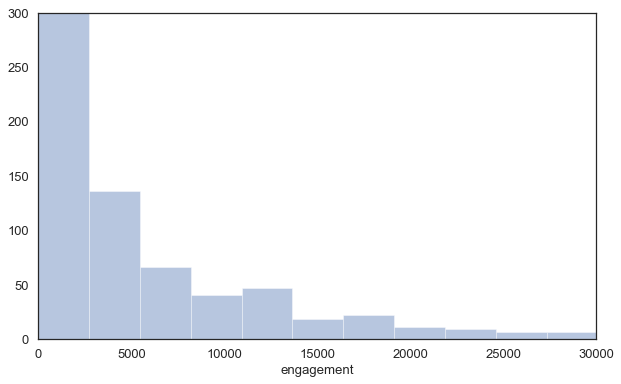

In [67]:
#The values are pretty high therefore we will limit x and y axes
sns.distplot(df_tesla['engagement'], bins=90, kde=False);
plt.ylim(0, 300)
plt.xlim(0, 30000)
plt.rcParams["figure.figsize"] = (10, 6)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

Tesla distplot shows high distribution of combined likes and retweets per tweet.

##### Musk descriptive statistic

In [39]:
df_musk.describe()

,len,id,Likes,RTs,engagement
count,3219.000000,3.219000e+03,3.219000e+03,3219.000000,3.219000e+03
mean,102.345449,1.032615e+18,1.855859e+04,2914.144455,2.147274e+04
std,72.192835,4.247776e+16,5.230721e+04,12049.119852,6.304085e+04
min,1.000000,9.389471e+17,0.000000e+00,4.000000,1.530000e+02
25%,42.000000,1.001226e+18,7.535000e+02,49.500000,1.021000e+03
50%,88.000000,1.026201e+18,1.986000e+03,248.000000,2.702000e+03
75%,140.000000,1.069858e+18,1.388950e+04,1704.500000,1.532400e+04
max,391.000000,1.104517e+18,1.209433e+06,389921.000000,1.599354e+06


The descriptive statistic of Musk twitter account shows that total amount of tweets is 3219. The sample size of the group  Musk's post is almost equal to the sample size of the group Tesla posts what means that there is no need for Leven's test equality of variance.


In [40]:
df_musk['engagement'].describe()

count    3.219000e+03
mean     2.147274e+04
std      6.304085e+04
min      1.530000e+02
25%      1.021000e+03
50%      2.702000e+03
75%      1.532400e+04
max      1.599354e+06
Name: engagement, dtype: float64

In [41]:
max(df_musk['engagement'])

1599354

Statistic of Musk engagement shows that maximum number of combined retweets and likes is 1599354, M = 2.147274e+04, SD = 6.304085e+04. All these numbers are really high and judging by descriptives higher than Tesla engagement. 
 

The distplot shows how Musk tweets stimulate customer engagement.

(array([  0., 100., 200., 300., 400., 500.]),
 <a list of 6 Text yticklabel objects>)

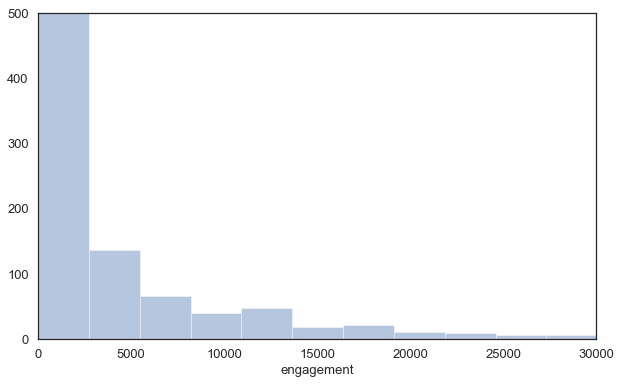

In [107]:
#The maximum engagement value which one of the tweet of Musk account is 1.5 million (combined retweets and likes). 
#Therefore, we have to limit x and y axes values of distplot to get readible graph.
sns.distplot(df_tesla['engagement'], bins=90, kde=False);
plt.ylim(0, 500)
plt.xlim(0, 30000)
plt.rcParams["figure.figsize"] = (10, 6)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

The distplot for Musk group shows extremely high distribution of engagement per tweet. The values per every tweet in Musk group are much higher than in Tesla group.


Checking groups for outliers

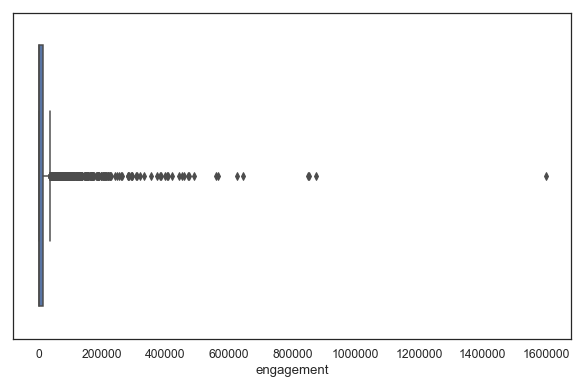

In [72]:
sns.boxplot(df_musk['engagement']);

From the musk engagement boxplot we can observe several outliers but we will do not anything with them because without them we will not get fully representative results. Also, these outliers may represent the viral conten what is good for engagement level.

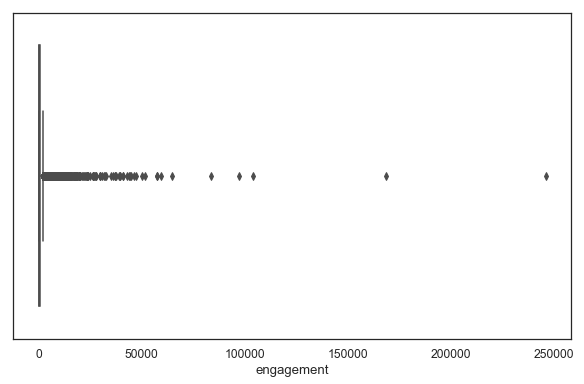

In [64]:
sns.boxplot(df_tesla['engagement']);

Tesla engagement boxplot is also present some outliers but we also have to leave them because without them we will not get fully representative results. 

### Hypothesis 2
For the second hypothesis we will perform vizualization for stock price variable 'close' and for approval variable 'likes'. To find correlation between stock price and approval we chose to analyse the price of the stock at the end of each day of given period and also compute overall number of likes for one specific day.

We chose Likes as a measurement for level of approval (not retweets or engagement) because users use retweets not only to show the approval but also to crtique the person of the initial post, thus engagement scale which includes tweets does not suit analysis as well.

In [84]:
overall_likes_stmu.count()

Date     279
close    279
Likes    279
dtype: int64

The information above shows us that we have data of stock price and likes for 279 days.
##### Likes descriptives

In [43]:
max(overall_likes_stmu['Likes'])

1363072

In [81]:
min(overall_likes_stmu['Likes'])

0

In [87]:
overall_likes_stmu['Likes'].describe()

count    2.790000e+02
mean     1.437846e+05
std      1.979895e+05
min      0.000000e+00
25%      1.923400e+04
50%      7.458800e+04
75%      1.876720e+05
max      1.363072e+06
Name: Likes, dtype: float64

The maximum number of likes in one of the day were equal 1363072. The minimum is zero. M = 71.89.


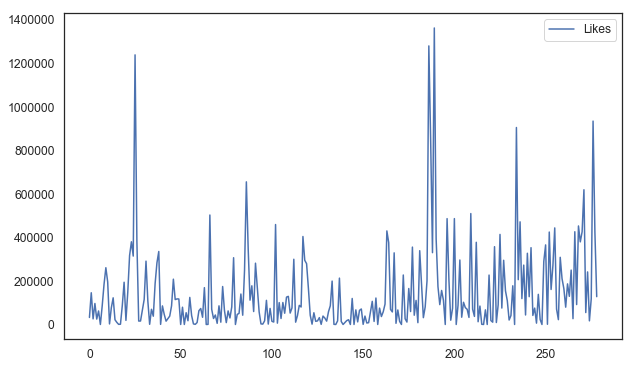

In [88]:
overall_likes_stmu[['Likes']].plot()

This plot shows distribution of likes over the given period (279 days). This plot shows pretty stable tendency in number of likes over 279 days. However, we also can see three days which have higher number of likes, probably some of the posts have gone viral.

C:\Users\witty\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


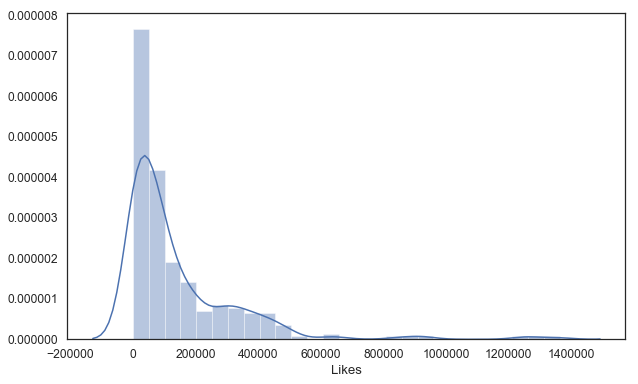

In [89]:
sns.distplot(overall_likes_stmu["Likes"]);

The distribution graph shows that there are many posts that have close to zero number of likes and that there are very little post with more than 500000 number of likes.

##### Close (low stock price) descriptives

In [44]:
max(overall_likes_stmu['close'])

379.57

In [79]:
min(overall_likes_stmu['close'])

250.56

In [85]:
overall_likes_stmu['close'].describe()

count    279.000000
mean     315.673154
std       27.739094
min      250.560000
25%      295.885000
50%      315.130000
75%      338.710000
max      379.570000
Name: close, dtype: float64

The highest stock price at the end of the day was 379.57. The lowest is 250.56. M = 315.67.

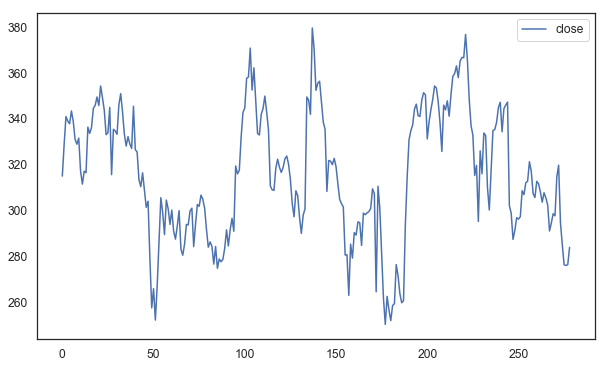

In [48]:
overall_likes_stmu[['close']].plot()

This plot shows stock price(end of the day) distribution over the given period (279 days). This plot shows some salient declines.

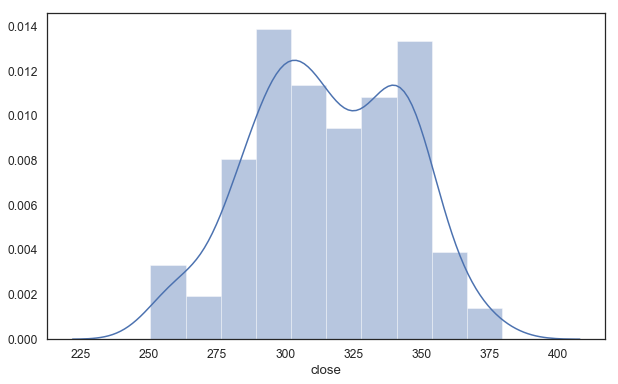

In [91]:
sns.distplot(overall_likes_stmu["close"]);

From the distplot above we can see bimodal stock price distribution.

##### Likes and stock price 

In [105]:
#we should normilize values to get more clear graph
overall_likes_stmu['Likes_norm'] = overall_likes_stmu['Likes'] * .0001

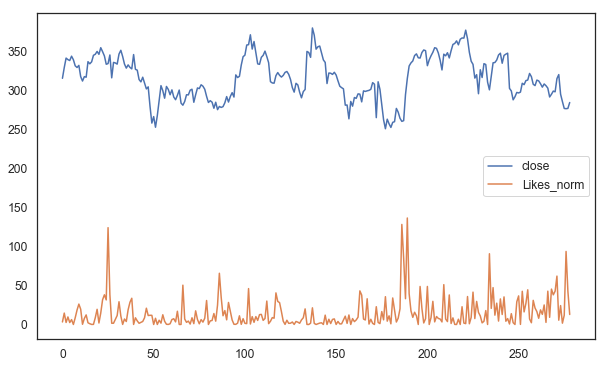

In [106]:
overall_likes_stmu[['close', 'Likes_norm']].plot()

The interesting thing is that the biggest and longest decline falls into the same days where were obseved the highest number of likes (from day 150 to day 200)

The linear regression plot is showed below.

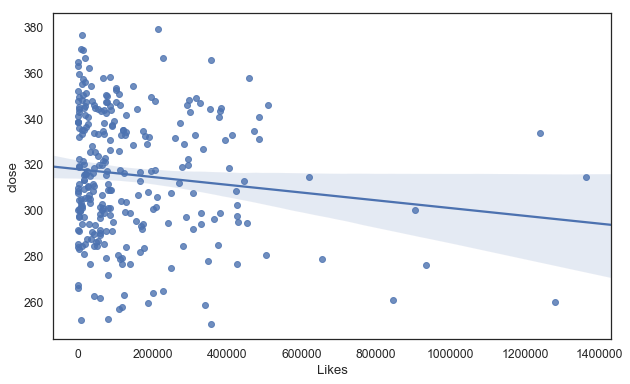

In [78]:
sns.regplot(x="Likes", y="close", data=overall_likes_stmu);

This is the poor scatterplot diagram with a bad model fit line. There are far less data values to the right of 600000 on the horizontal axis. As a result, most of the right side of the chart is empty and all the data values are squeezed against the left side of the chart. There are some outliers on the right side of the plot which we left to get more representative results. Scatterplot shows very weak negative correlation between number of likes and stock price though it should be tested with OLS regression.

## Modeling and hypotheses testing
### Testing hypothesis 1
To test hypothesis 1 we chose t-test.

H1.   Tweets from Elon Musk about Tesla receive more customer engagement on Twitter than tweets from the official Tesla account.

There are two categorical independent variables – two groups. The first group is posts from the Elon Musk twitter account, the second group is posts from the Tesla company official twitter account. Posts were taken as units of analyzation. The continuous dependent variable is customer engagement. Two different groups of independent variables allow us to conduct the independent T-test. The significant differences in means which we observed from descriptive statistics above should be confirmed with statistical testing.




In [55]:
from scipy.stats import ttest_ind

In [56]:
group1 = df_musk[['engagement']]
group2 = df_tesla[['engagement']]

In [57]:
#Running independent t-test
print(len(group1), len(group2), len(group1) / (len(group1) + len(group2)))

3219 3203 0.5012457178449081


In [58]:
results_h1 = ttest_ind(group1.values, group2.values)

In [59]:
results_h1

Ttest_indResult(statistic=array([17.44158271]), pvalue=array([1.34335621e-66]))

Groups have equal size. T-tested showed significant result (p < 0.05, t = 17.4). Posts by Musk account (M=21472.73, SD=63040.85, N= 3219) significantly larger than posts by Tesla account (M=1892.32, SD = 7929.81, N= 3203). Result of the t-test supported the first hypothesis - posts by Musk lead to higher engagement level than post by Tesla company.

### Testing hypothesis 2
For the second hypothesis we chose to run Linear regression analysis.
We chose this analysis because: first, we want to establish prediction, second, both of our variables are continous. Likes is a continious independent variable (with values from 0 to 1.3 million likes), close is also a continious dependent variable with maximum value 379.57. 

In [60]:
#importin necessary modules
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [61]:
#Running linear regression analysis
reg1 = sm.OLS(overall_likes_stmu['close'], sm.add_constant(overall_likes_stmu['Likes']))
result_reg1 = reg1.fit()
print(result_reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     4.127
Date:                Fri, 22 Mar 2019   Prob (F-statistic):             0.0431
Time:                        11:37:19   Log-Likelihood:                -1320.4
No. Observations:                 279   AIC:                             2645.
Df Residuals:                     277   BIC:                             2652.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        318.1141      2.042    155.767      0.0

The OLS model for the hypothesis 2 is significant(F = 4.127, p = 0.04). This means that the model can predict changes of Tesla stock price by measuring level of Elon Musk approval (Likes). However, the model is marginally significant and the strenght of prediction is weak. The model explains only 1.5% of the variance (R^2=.015) and shows that this is not a good model. The predictor Likes showed negative relationship (b = -0.00001698).For every unit increase in likes stocks will decrease by -0.00001698 units (t=-2.032,p<0.05). We can see the correlation of two variables but relationship is negative in its nature therefore Hypothesis 2 was not supported. 

## Evaluation
The obtained results allow us to answer the research question. First, the tweets from Elon Musk twitter account leads to higher level of engagement than tweets from Tesla company account. This goes in line with the McCracken study and proves that Tesla cars are greatly associated with CEO of Tesla company Elon Musk. Also, it proves that Elon Musk account has the higher level of post reach and therefore the higher level of connection with his followers. Summing up, these all can be interpreted like this: when someone say Tesla you think firstly about Musk, not about Tesla car range.

This first supported assumption gave us the right to check whether Musk account correlates with Tesla success and therefore Tesla stock price. Regression analysis showed that the number of likes of Elon Musk twitter account is correlated with Tesla company stock price but relationship between likes and stock price is negative what makes us reject Hypothesis 2. 

The results we got means that with every tweet which gets above the average number of likes per day Tesla stock price goes down. This result does not go in line with any theory, moreover, significance of the model as whole is yet marginal what means that there is possibility to neglect any correlation between these two variables. 

We rejected correlation between Elon Musk tweets and Tesla stock price and therefore we do not recommend Tesla director’s board to control for every Elon Musk tweet. Moreover, Musk as a symbol of Tesla company (Aaker, 1997)  provide Tesla company with more brand recognition, and extremely high level of engagement on his twitter is only a plus for company success. 

Word counts: 279


## Limitations
-	The posts from Elon Musk tweeter account contains not only posts about Tesla car but also about SpaceX, Boring Company and tweets on different topics. This means that Tesla company account tweets are more narrowed and address to one specific customer type which does not represent the whole population.
-	Musk account has significantly high engagement (the higher number of likes and retweets) this is because of unequal number of followers. However, we took an equal number of posts from both accounts what gave us the right to compare means and to prove what we want to prove – different levels of engagement. 
-	We measured engagement with two combined items – likes and retweets, though each component was not tested separately. The separate measurement could give different result.
-	The engagement values for Elon Musk tweets are too high for the proper visualization (one of the tweets reaches 1,5 million combined likes and retweets) 
-	These two account are really popular what makes them the tarhet for bots and other spammers. The two circumstances shoul be under control for more clear results.
- The regression analysis showed marginally significant result.

## Next steps
1.	The next study may compare engagements from different twitter account companies (SpaceX, The Boring Company) with which Elon Musk is associated as well. 
2. The next study may measure retweets and likes separately to understand whether there are different inclinations and tendencies.
2.	To avoid low significanse of OLS the content (context) of the tweets and mentions of Elon Musk should be taken into consideration and treated as moderator variable.
3.	The next study may compare engagements from different twitter account companies (SpaceX, The Boring Company) with which Elon Musk is associated as well. t
5.	It is necessary to replicate the study with the upgraded Twitter API, because it will allow to make sentiment analysis on the comment which will be get with Musk and 
6. Stock price shwows temporal dynamics therefore Time series analysis should be taken into account.

Word counts: 337


## Ethical, Privacy and Normative Considerations
Without doubt there are some ethical and privacy issues when it comes to Twitter data collection. First of all, despite the fact that all users ‘sign’ a consent form upon the registration in any social media network, not all of them actually read this form because of its complexity and length. So, here we get an ethical dilemma - people do not aware that they have agreed their data to be collected for example, for research purposes. Or there is another situation, when users do not know that their account is public. Moreover, there is a difference between being in public and being public (actively capture attention) which social media sites do not distinguish (boyd & Marwick, 2011). Users usually expect some level of privacy when they involve in Twitter(Ahmed, Bath & Demartini, 2017).

Twitter allows to limit access to user’s personal data, but it may affect the positive experience on the site because access to the most functions turns out to be restricted. This does not seem ethical as well (van den Hoven et al., 2014).
Twitter API privacy policy ensures that tokens and keys cannot be available for a third party (Developer Agreement and Policy, 2018) however the leakage of these information is still possible what may bring problem to my personal data and data of users which were collected.

The absence of consent from users whose data were collected is not normatively correct. (Williams, Burnap &Sloan, 2017). Moreover, the GDPR regulation is also stated that it is important to inform users that their data were collected for specific purposes/research. (ESOMAR, 2017) However, in fact this rule is violated because users are never informed that their data were collected for a specific research project.

Twitter policy allows to create a Twitter account only if a person has reached at least 13 years old but according to data protection requirements for researchers it is not allowed to use data of individuals under 17 years old without their parents consent(ESOMAR,2017).

Words count: 332


## References
Aaker, J. (1997). Dimensions of Brand Personality. Journal of marketing research, 347-356.

Ackley, Gardner (1961). Say's Law and the Quantity Theory of Money. Macroeconomic Theory. New York: Macmillan.

Ahmed, W., Bath, P. and Demartini, G. (2017). Chapter 4 Using Twitter as a Data Source: An Overview of Ethical, Legal, and Methodological Challenges. In: Woodfield, K., (ed.) The Ethics of Online Research. Advances in Research Ethics and Integrity (2),79-107. 

Booth, N., Matic, J.A. (2011). Mapping and leveraging influencers in social media to shape corporate brand perceptions", Corporate Communications: An International Journal, 16-3,184-191, https://doi.org/10.1108/13563281111156853 

Boyd, D. & Marwick, A. (2011). Social privacy in networked publics: teens’ attitudes, practices, and strategies. Oxford Internet Institute, http://papers.ssrn.com/sol3/papers.cfm?abstract_.

Bucher, T. (2012). Want to be on the top? Algorithmic power and the threat of invisibility on Facebook. New Media & Society, 14(7), 1164–1180. https://doi.org/10.1177/1461444812440159

Davis, A. (2018). A brief history of Elon Musk's market moving tweets. WIRED. Retrieved from https://www.wired.com/story/elon-musk-twitter-stock-tweets-libel-suit/

Developer Agreement and Policy/Developer Agreement(2018). Retrieved from: https://developer.twitter.com/en/developer-terms/agreement-and-policy.html

ESOMAR Guidelines for Data Protection / GDPR(2017). Retrieved from: : https://www.esomar.org/uploads/public/knowledge-and-standards/codes-and-guidelines/ESOMAR-Data-Protection-Checklist_September-2017.pdf

Ferris, R. (2019). Tesla is down 7% thanks to Elon Musk’s tweets — he’s all but wiped out the gains Tesla got for settling with the SEC. CNBC. Retrieved from https://www.cnbc.com/2018/10/05/tesla-shares-drop-nearly-5percent-after-musk-mocks-sec-on-twitter.html

Fleishman, G. (2018). ‘Pedo,’ ‘Private’ and ‘Pravda’: How Elon Musk’s Twitter Posts Are Trouble for Tesla. Fortune. Retrieved from http://fortune.com/2018/08/29/elon-musk-twitter-tesla-stock-pedo-private-pravda-tweet/

Get Statuses user_timelines, Developer (2017). Retrieved from https://developer.twitter.com/en/docs/tweets/timelines/api-reference/get-statuses-user_timeline.html 

Get Statuses/mentions_timelines (2017). Retrieved from https://developer.twitter.com/en/docs/tweets/timelines/api-reference/get-statuses-mentions_timeline.html  

Growth in Tesla (2018) Retrieved from https://cleantechnica.com/2018/10/04/25913-growth-in-tesla-sales-in-6-years/ 

McCracken, Grant (1989), Who Is the Celebrity Endorser? Cultural Foundations of the Endorsement Process, Journal of Consumer Research, 16(3), 310-21.

Neate, R. (2019). Elon Musk could face contempt charge over 'inaccurate' Tesla tweet. The Guardian. Retieved from https://www.theguardian.com/technology/2019/feb/25/elon-musk-tesla-judge-contempt-sec

Ohnsman, A.( 2019). Elon Musk's Tesla Tweet Puts CEO Role At Risk Again. Forbes. Retrieved from
https://www.forbes.com/sites/alanohnsman/2019/02/25/elon-musks-tesla-tweet-puts-ceo-role-at-risk-again/#1a773a556cdb 

Pickle vs JSON, 2010. Retrieved from https://konstantin.blog/2010/pickle-vs-json-which-is-faster/ 

Williams, M., Burnap, P. & Sloan, L. (2017). Towards an Ethical Framework for Publishing Twitter Data in Social Research: Taking into Account Users’ Views, Online Context and Algorithmic Estimation, Sociology. 51(6), 1149-1168.

Williams,P. & Naumann, E. (2011). Customer satisfaction and business performance: a firm‐level analysis. Journal of Services Marketing, 25(1,) 20-32, https://doi.org/10.1108/08876041111107032 

Wolverton, T. (2019). Elon Musk’s tweets make it look like Tesla’s revamped board is still bad at its job — and it could get the company into even more trouble. Business Insider. Retrieved from https://www.businessinsider.nl/elon-musk-twitter-board-of-directors-2019-2/?international=true&r=US

Van den Hoven, J., Blaauw, M., Pieters, W., & Warnier, M. (2014). Privacy and information technology.
